In [1]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [3]:
m = mp.Model()

a = m.add_var(name="a", var_type=mp.CONTINUOUS)
b = m.add_var(name="b", var_type=mp.CONTINUOUS)

m += 2 * a + 4 * b <= 240
m += a <= 100
m += a >= 4 * b

m.objective = mp.maximize(20 * a + 50 * b)

m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 2 (-1) rows, 2 (0) columns and 4 (-1) elements
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 2600
Clp0000I Optimal - objective value 2600
Clp0000I Optimal - objective value 2600
Coin0511I After Postsolve, objective 2600, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2600 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [4]:
print(f"A sells: {a.x:.4f}")
print(f"B sells: {b.x:.4f}")
print(f"Max return: {m.objective_value}")

A sells: 80.0000
B sells: 20.0000
Max return: 2600.0


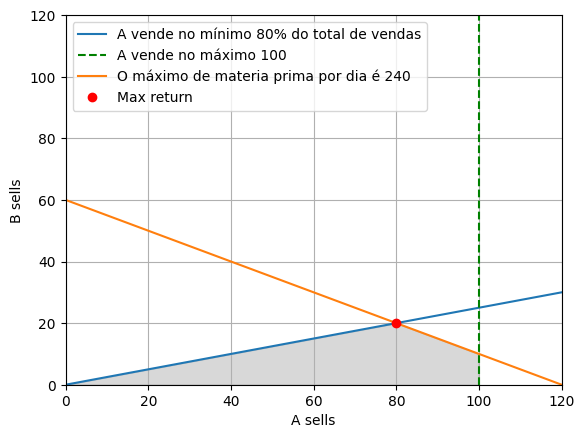

In [10]:
x = np.linspace(0, 120, 120)

r1 = 0.25 * x
plt.plot(x, r1, label="A vende no mínimo 80% do total de vendas")

r2 = 100
plt.axvline(x=r2, color='green', linestyle='--', label="A vende no máximo 100")

r3 = (240 - 2 * x) / 4
plt.plot(x, r3, label="O máximo de materia prima por dia é 240")

plt.xlim(0, 120)
plt.ylim(0, 120)

plt.xlabel("A sells")
plt.ylabel("B sells")
plt.plot(a.x, b.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(r1, r3), where=(x <= r2), color="gray", alpha=0.3)

plt.grid()
plt.legend()
plt.show()